<a href="https://colab.research.google.com/github/taibaseddeq/Classification-task-Music-Genre/blob/main/Music_Genre_Classification_Task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Final project Level1 Shai AI Training <br>
Team1 Group11 <br>
the members: Taiba Seddeq, Lara Faroun <br>
the monter:Eng. Wesam Al-Suhli**

# 1.Framing the Problem

It is a classification task - Supervised Learning. the dataset is "music genre", thus The 'class' column is the label.


# **Dataset Description**

**Artist:** Name of the Artist. <br>
**Track Name:** Name of the Track. <br>

**popularity:** The higher the value, the more popular the song is. <br>

**danceability:** Danceability describes how suitable a track is for dancing, based on a combination of musical elements including tempo, rhythm. <br>

**energy:** Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. <br>

**key:** The key the track is in. Integers map to pitches using standard Pitch Class notation. E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on.. <br>

**loudness:** The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative. <br>

**mode:** Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0. <br>

**speechiness:** Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks. <br>

**acousticness:** A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic. <br>

**instrumentalness:** Predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0. <br>

**liveness:** Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live. <br>

**valence:** A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry). <br>

**tempo:** The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration. <br>

**duration in milliseconds:** Time of the song. <br>

**time_signature:** a notational convention used in Western musical notation to specify how many beats (pulses) are contained in each measure (bar), and which note value is equivalent to a beat. <br>

**Class:** Genre of the track. <br>

#### **Setting-up Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Getting the Data

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
train = pd.read_csv('/content/drive/MyDrive/SHAI Training/Level 1/Final Project T1 G11/train.csv')
test = pd.read_csv('/content/drive/MyDrive/SHAI Training/Level 1/Final Project T1 G11/test.csv')

# 2.Discovering the data

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14396 entries, 0 to 14395
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  14396 non-null  int64  
 1   Artist Name         14396 non-null  object 
 2   Track Name          14396 non-null  object 
 3   Popularity          14045 non-null  float64
 4   danceability        14396 non-null  float64
 5   energy              14396 non-null  float64
 6   key                 12784 non-null  float64
 7   loudness            14396 non-null  float64
 8   mode                14396 non-null  int64  
 9   speechiness         14396 non-null  float64
 10  acousticness        14396 non-null  float64
 11  instrumentalness    10837 non-null  float64
 12  liveness            14396 non-null  float64
 13  valence             14396 non-null  float64
 14  tempo               14396 non-null  float64
 15  duration_in min/ms  14396 non-null  float64
 16  time

In [ ]:
train.head()

id                 Artist Name                          Track Name  \
0   0  Lata Mangeshkar, Hariharan                       Likha Hai Yeh   
1   1                  Kalan.FrFr  No Love ft. Mozzy & Cypress Moreno   
2   2                    The Cure                      Play For Today   
3   3               Miguel Poveda                   Coplas Del Querer   
4   4              Leif Vollebekk                     Long Blue Light   

   Popularity  danceability  energy   key  loudness  mode  speechiness  \
0        23.0         0.370   0.670   7.0   -11.007     0       0.0445   
1        45.0         0.659   0.639   6.0    -8.138     1       0.3880   
2        51.0         0.458   0.731  11.0   -12.049     0       0.1450   
3        40.0         0.508   0.287   5.0    -8.898     0       0.0481   
4        63.0         0.552   0.485   9.0    -9.111     1       0.0332   

   acousticness  instrumentalness  liveness  valence    tempo  \
0        0.8090          0.000006    0.2360    0.802  177.164   
1        0.4160               NaN    0.1160    0.688   99.517   
2        0.0487          0.021500    0.1160    0.784   80.425   
3        0.8340               NaN    0.0963    0.324   96.139   
4        0.5170          0.106000    0.1640    0.510   71.548   

   duration_in min/ms  time_signature  Class  
0            5.209333               3      3  
1       206602.000000               4      5  
2       218960.000000               4      6  
3       332467.000000               3      9  
4       200173.000000               4      1

# 3.Visualizing and Analyzing the Data

## Categorical columns:

In [ ]:
 print(train['Track Name'].unique(),', \nThe tracks number =',train['Track Name'].nunique())

['Likha Hai Yeh' 'No Love ft. Mozzy & Cypress Moreno' 'Play For Today' ...
 'WAYO (KPE LE WU)' 'Making a Home' 'Is There Anybody out There?'] , 
The tracks number = 12396


In [ ]:
train['Track Name'].value_counts()

Dreams                              8
Hurricane                           7
Forever                             7
Runaway                             7
Fire                                7
                                   ..
El Sicuri                           1
Like a Hurricane - 2003 Remaster    1
Necrogenic Resurrection             1
Love's Gonna Live Here              1
Is There Anybody out There?         1
Name: Track Name, Length: 12396, dtype: int64

In [ ]:
 print(train['Artist Name'].unique(),', \nThe Artists number =',train['Artist Name'].nunique())

['Lata Mangeshkar, Hariharan' 'Kalan.FrFr' 'The Cure' ... 'Maddie Medley'
 'Ólafur Arnalds, Alice Sara Ott' 'WurlD'] , 
The Artists number = 7891


In [ ]:
train['Artist Name'].value_counts().head(10)

Backstreet Boys       59
Westlife              48
Britney Spears        43
Eyal Golan            42
Omer Adam             34
Shlomo Artzi          34
Dudu Aharon           30
Hadag Nahash          29
The Rolling Stones    29
Yehudit Ravitz        27
Name: Artist Name, dtype: int64

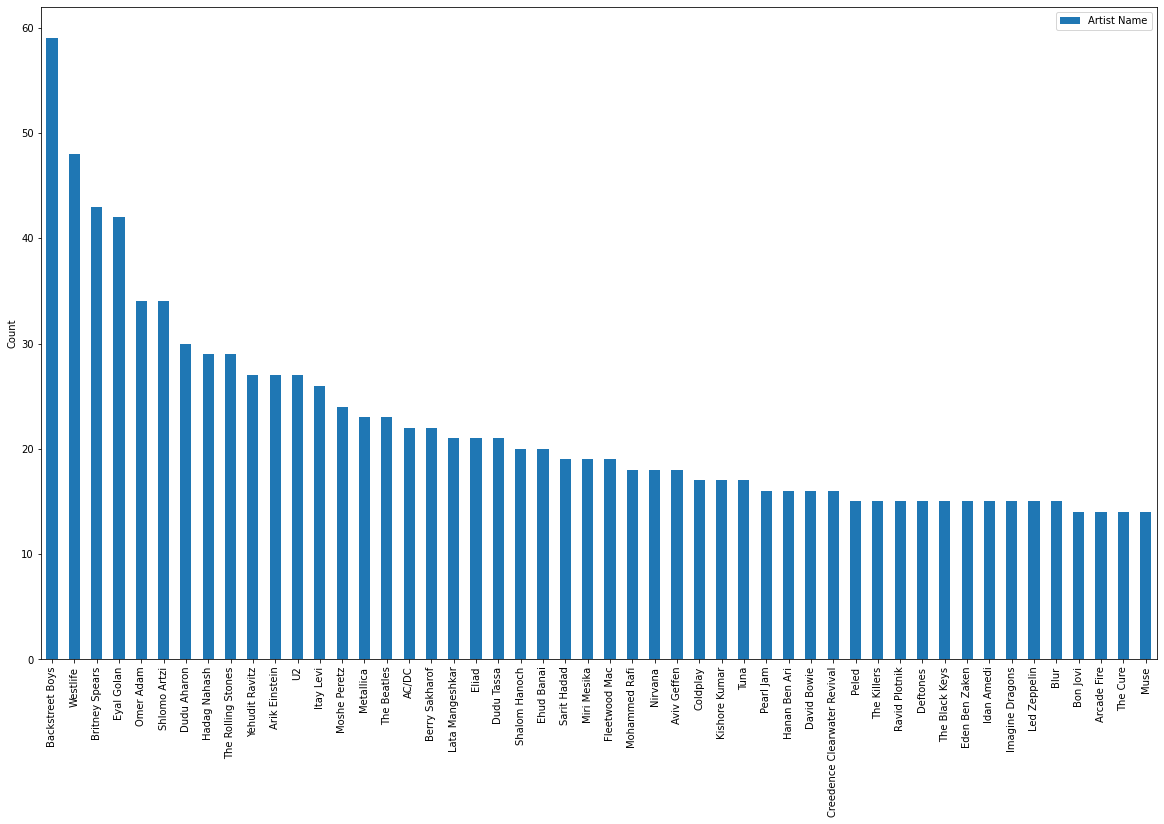

In [ ]:
train['Artist Name'].value_counts().to_frame().head(50).plot(kind='bar',figsize=(20,12))
plt.ylabel('Count')
plt.show()

In [ ]:
#Discovering each Artist's Tracks: Sorting the tracks according to the Artists Names, and count them:
cat=train[['Artist Name','Track Name']].groupby(['Artist Name'])['Track Name'].value_counts().to_frame()
cat

Track Name
Artist Name       Track Name                                                    
$NOT              Whipski (feat. Lil Skies & Internet Money)                   1
$uicideboy$       ...And To Those I Love, Thanks For Sticking Around           1
'68               Bad Bite                                                     3
(Hed) P.E.        Renegade                                                     1
                  Suck It Up                                                   1
...                                                                          ...
◊û◊ê◊ô◊õ◊ï        ◊õ◊û◊î ◊õ◊°◊£ ◊ê◊ô◊ü ◊ú◊ô                                    1
◊û◊ô◊†◊ï◊° ◊ê◊§◊° ◊¢◊ì◊ô◊£ ◊ú◊ê ◊ú◊î◊ô◊§◊í◊©                                   1
                  ◊ô◊ï◊ù ◊©◊ú◊ô◊©◊ô                                            1
◊û◊õ◊ú◊ï◊£        ◊ê◊ú ◊™◊ë◊ï◊ê◊ô ◊ê◊ú◊ô◊ô                                     1
◊†◊ê◊ì◊î          ◊ó◊ï◊®◊£                                                     1

[13093 rows x 1 columns]

(array([-2000.,     0.,  2000.,  4000.,  6000.,  8000., 10000., 12000.,
        14000.]),
 [Text(-2000.0, 0, '(The Haunted, Preachers of Death)'),
  Text(0.0, 0, '($NOT, Whipski (feat. Lil Skies & Internet Money))'),
  Text(2000.0, 0, '(Candye Kane, You Need Love)'),
  Text(4000.0, 0, '(Focus, Hocus Pocus - Original Single Version)'),
  Text(6000.0, 0, '(Kenny Chesney, American Kids)'),
  Text(8000.0, 0, "(Noel Gallagher's High Flying Birds, AKA... What A Life!)"),
  Text(10000.0, 0, "(Sleeping Wolf, You Don't Know What It's Like)"),
  Text(12000.0, 0, '(U2, The Troubles)'),
  Text(14000.0, 0, '')])

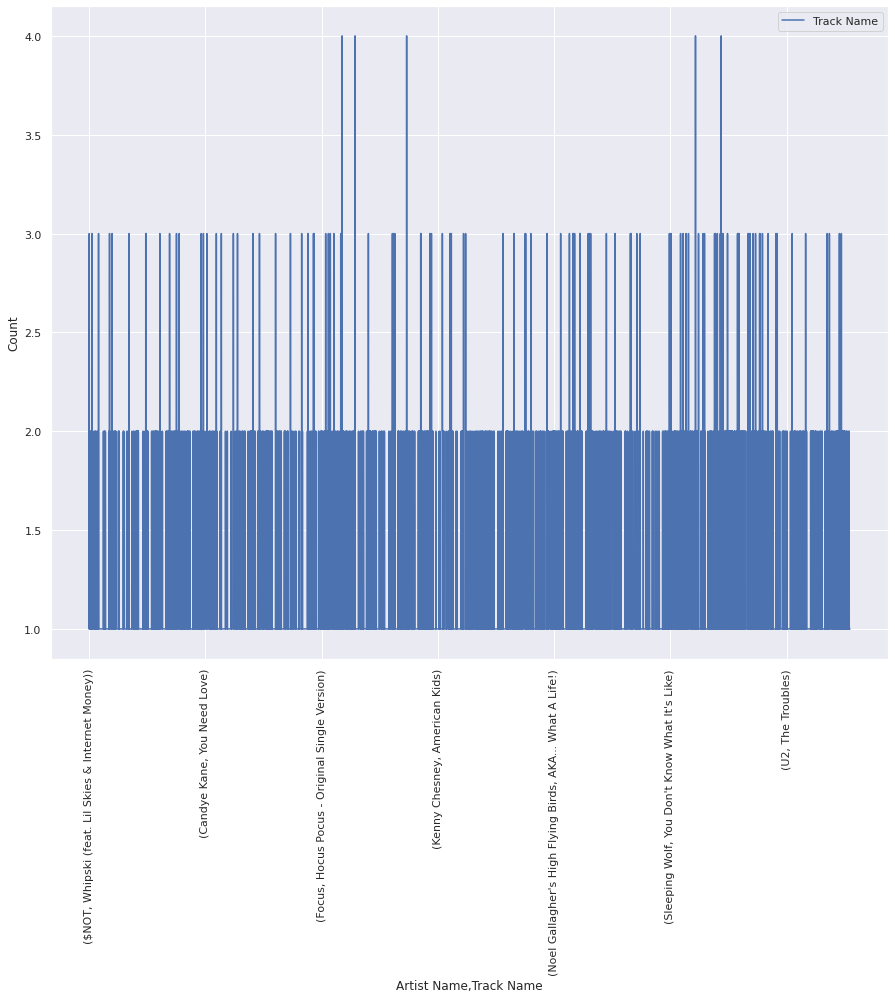

In [ ]:
cat.plot(legend=True,figsize=(15,12))
plt.ylabel('Count')
plt.xticks(rotation = 45)

In [ ]:
(cat[['Track Name']]==4).sum()

Track Name    5
dtype: int64

## Numerical Columns:

In [ ]:
train.describe()

id    Popularity  danceability        energy           key  \
count  14396.000000  14396.000000  14396.000000  14396.000000  14396.000000   
mean    7197.500000     44.577522      0.542981      0.663347      5.962559   
std     4155.911573     17.222889      0.166668      0.235709      3.006706   
min        0.000000      1.000000      0.059600      0.000020      1.000000   
25%     3598.750000     33.000000      0.430000      0.510000      4.000000   
50%     7197.500000     44.000000      0.545000      0.701000      6.000000   
75%    10796.250000     56.000000      0.659000      0.861000      8.000000   
max    14395.000000    100.000000      0.989000      0.999000     11.000000   

           loudness          mode   speechiness  acousticness  \
count  14396.000000  14396.000000  14396.000000  14396.000000   
mean      -7.897393      0.638580      0.079479      0.246606   
std        4.063214      0.480429      0.083048      0.310371   
min      -39.952000      0.000000      0.022500      0.000000   
25%       -9.525250      0.000000      0.034800      0.004208   
50%       -7.006000      1.000000      0.047400      0.080750   
75%       -5.161000      1.000000      0.082500      0.434000   
max        1.355000      1.000000      0.955000      0.996000   

       instrumentalness      liveness       valence         tempo  \
count      10837.000000  14396.000000  14396.000000  14396.000000   
mean           0.177489      0.195594      0.486931    122.729981   
std            0.304133      0.158487      0.240281     29.558253   
min            0.000001      0.013600      0.018300     34.132000   
25%            0.000088      0.097400      0.299000     99.799000   
50%            0.003920      0.129000      0.481000    120.069500   
75%            0.199000      0.257000      0.673000    141.990250   
max            0.996000      1.000000      0.986000    217.416000   

       duration_in min/ms  time_signature         Class  
count        1.439600e+04    14396.000000  14396.000000  
mean         2.009550e+05        3.927341      6.695679  
std          1.118463e+05        0.352828      3.206170  
min          5.339167e-01        1.000000      0.000000  
25%          1.669988e+05        4.000000      5.000000  
50%          2.095845e+05        4.000000      8.000000  
75%          2.522970e+05        4.000000     10.000000  
max          1.477187e+06        5.000000     10.000000

In [ ]:
(train['time_signature'] <= 2).sum()

0

In [ ]:
num_col = train[['Popularity','danceability','energy','key','loudness',
                 'mode','speechiness','acousticness','instrumentalness','liveness',
                 'valence','tempo','duration_in min/ms','time_signature','Class']]

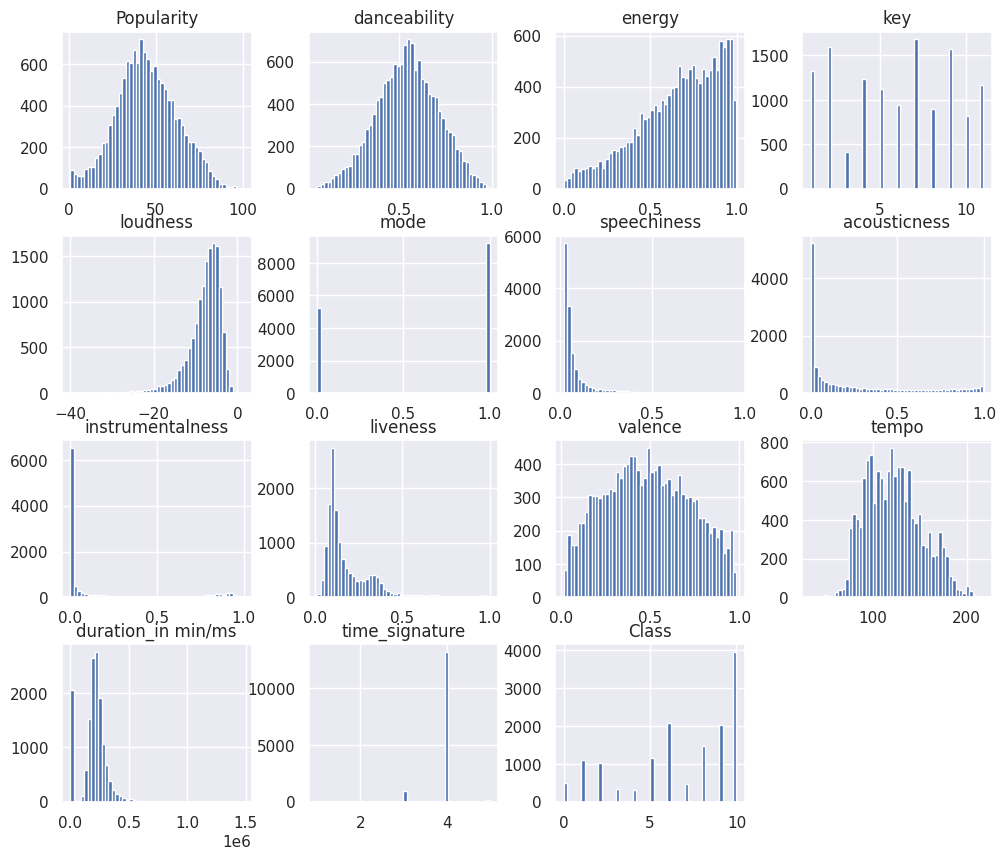

In [ ]:
sns.set(rc = {'figure.figsize':(12,10)})
num_col.hist(bins=50)
plt.show()

In [ ]:
train['time_signature'].value_counts().to_frame()

time_signature
4           13200
3             953
5             159
1              84

In [ ]:
train['Class'].value_counts().to_frame()

Class
10.0   3959
6.0    2069
9.0    2019
8.0    1483
5.0    1157
1.0    1098
2.0    1018
0.0     500
7.0     461
3.0     322
4.0     310

**#Notes** <br>
types of distributions: <br>
**discrete** >>> key, mode, time_signature, class <br>
**continuous** >>> <br>

*   left-skewed dist. >> energy
*   normal dist. >> popularity, danceability, valence, tempo
*   Columns have range from 0.0 to 1.0: acousticness, danceability, speechiness,valence, energy, instrumentalness, liveness, mode


In [ ]:
disc_col=train[['key','mode','time_signature','Class']]

In [ ]:
cont_col= train[['Popularity','danceability','energy','loudness','speechiness','acousticness',
            'instrumentalness','liveness','valence','tempo','duration_in min/ms']]

<AxesSubplot:>

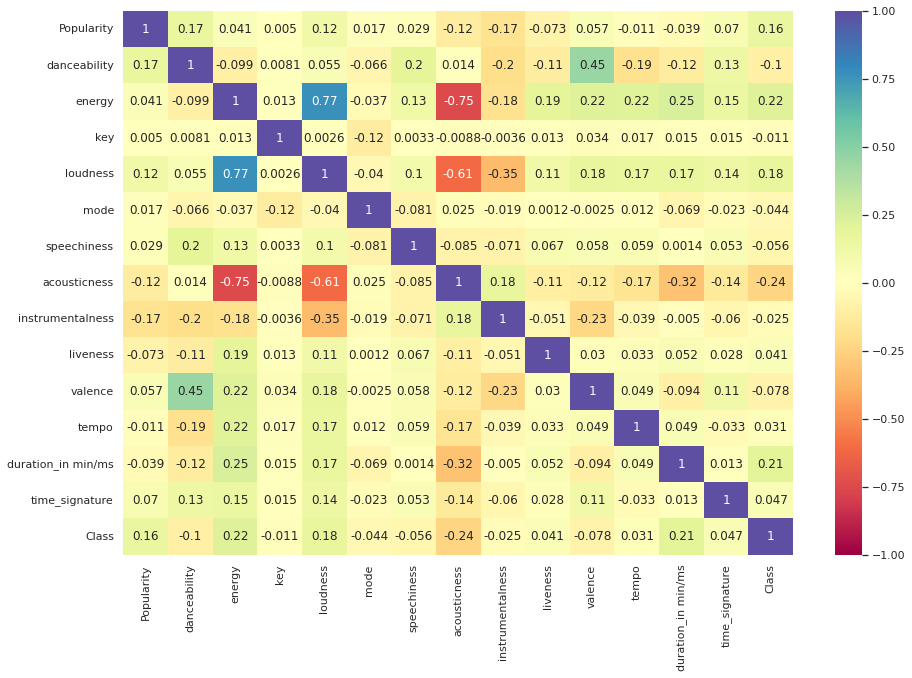

In [ ]:
sns.set(rc = {'figure.figsize':(15,10)})
sns.heatmap(num_col.corr(),cmap="Spectral",vmax=1,vmin=-1,center=0,annot=True)

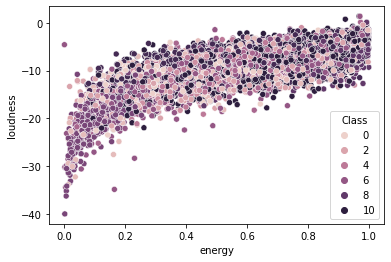

In [ ]:
sns.scatterplot(data=train, x=train.energy, y=train.loudness, hue="Class")

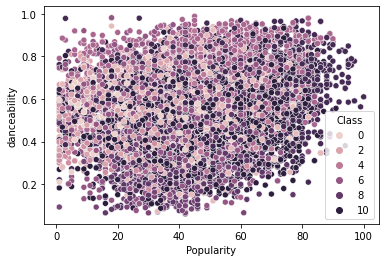

In [ ]:
sns.scatterplot(data=train, x=train.Popularity, y=train.danceability, hue="Class")

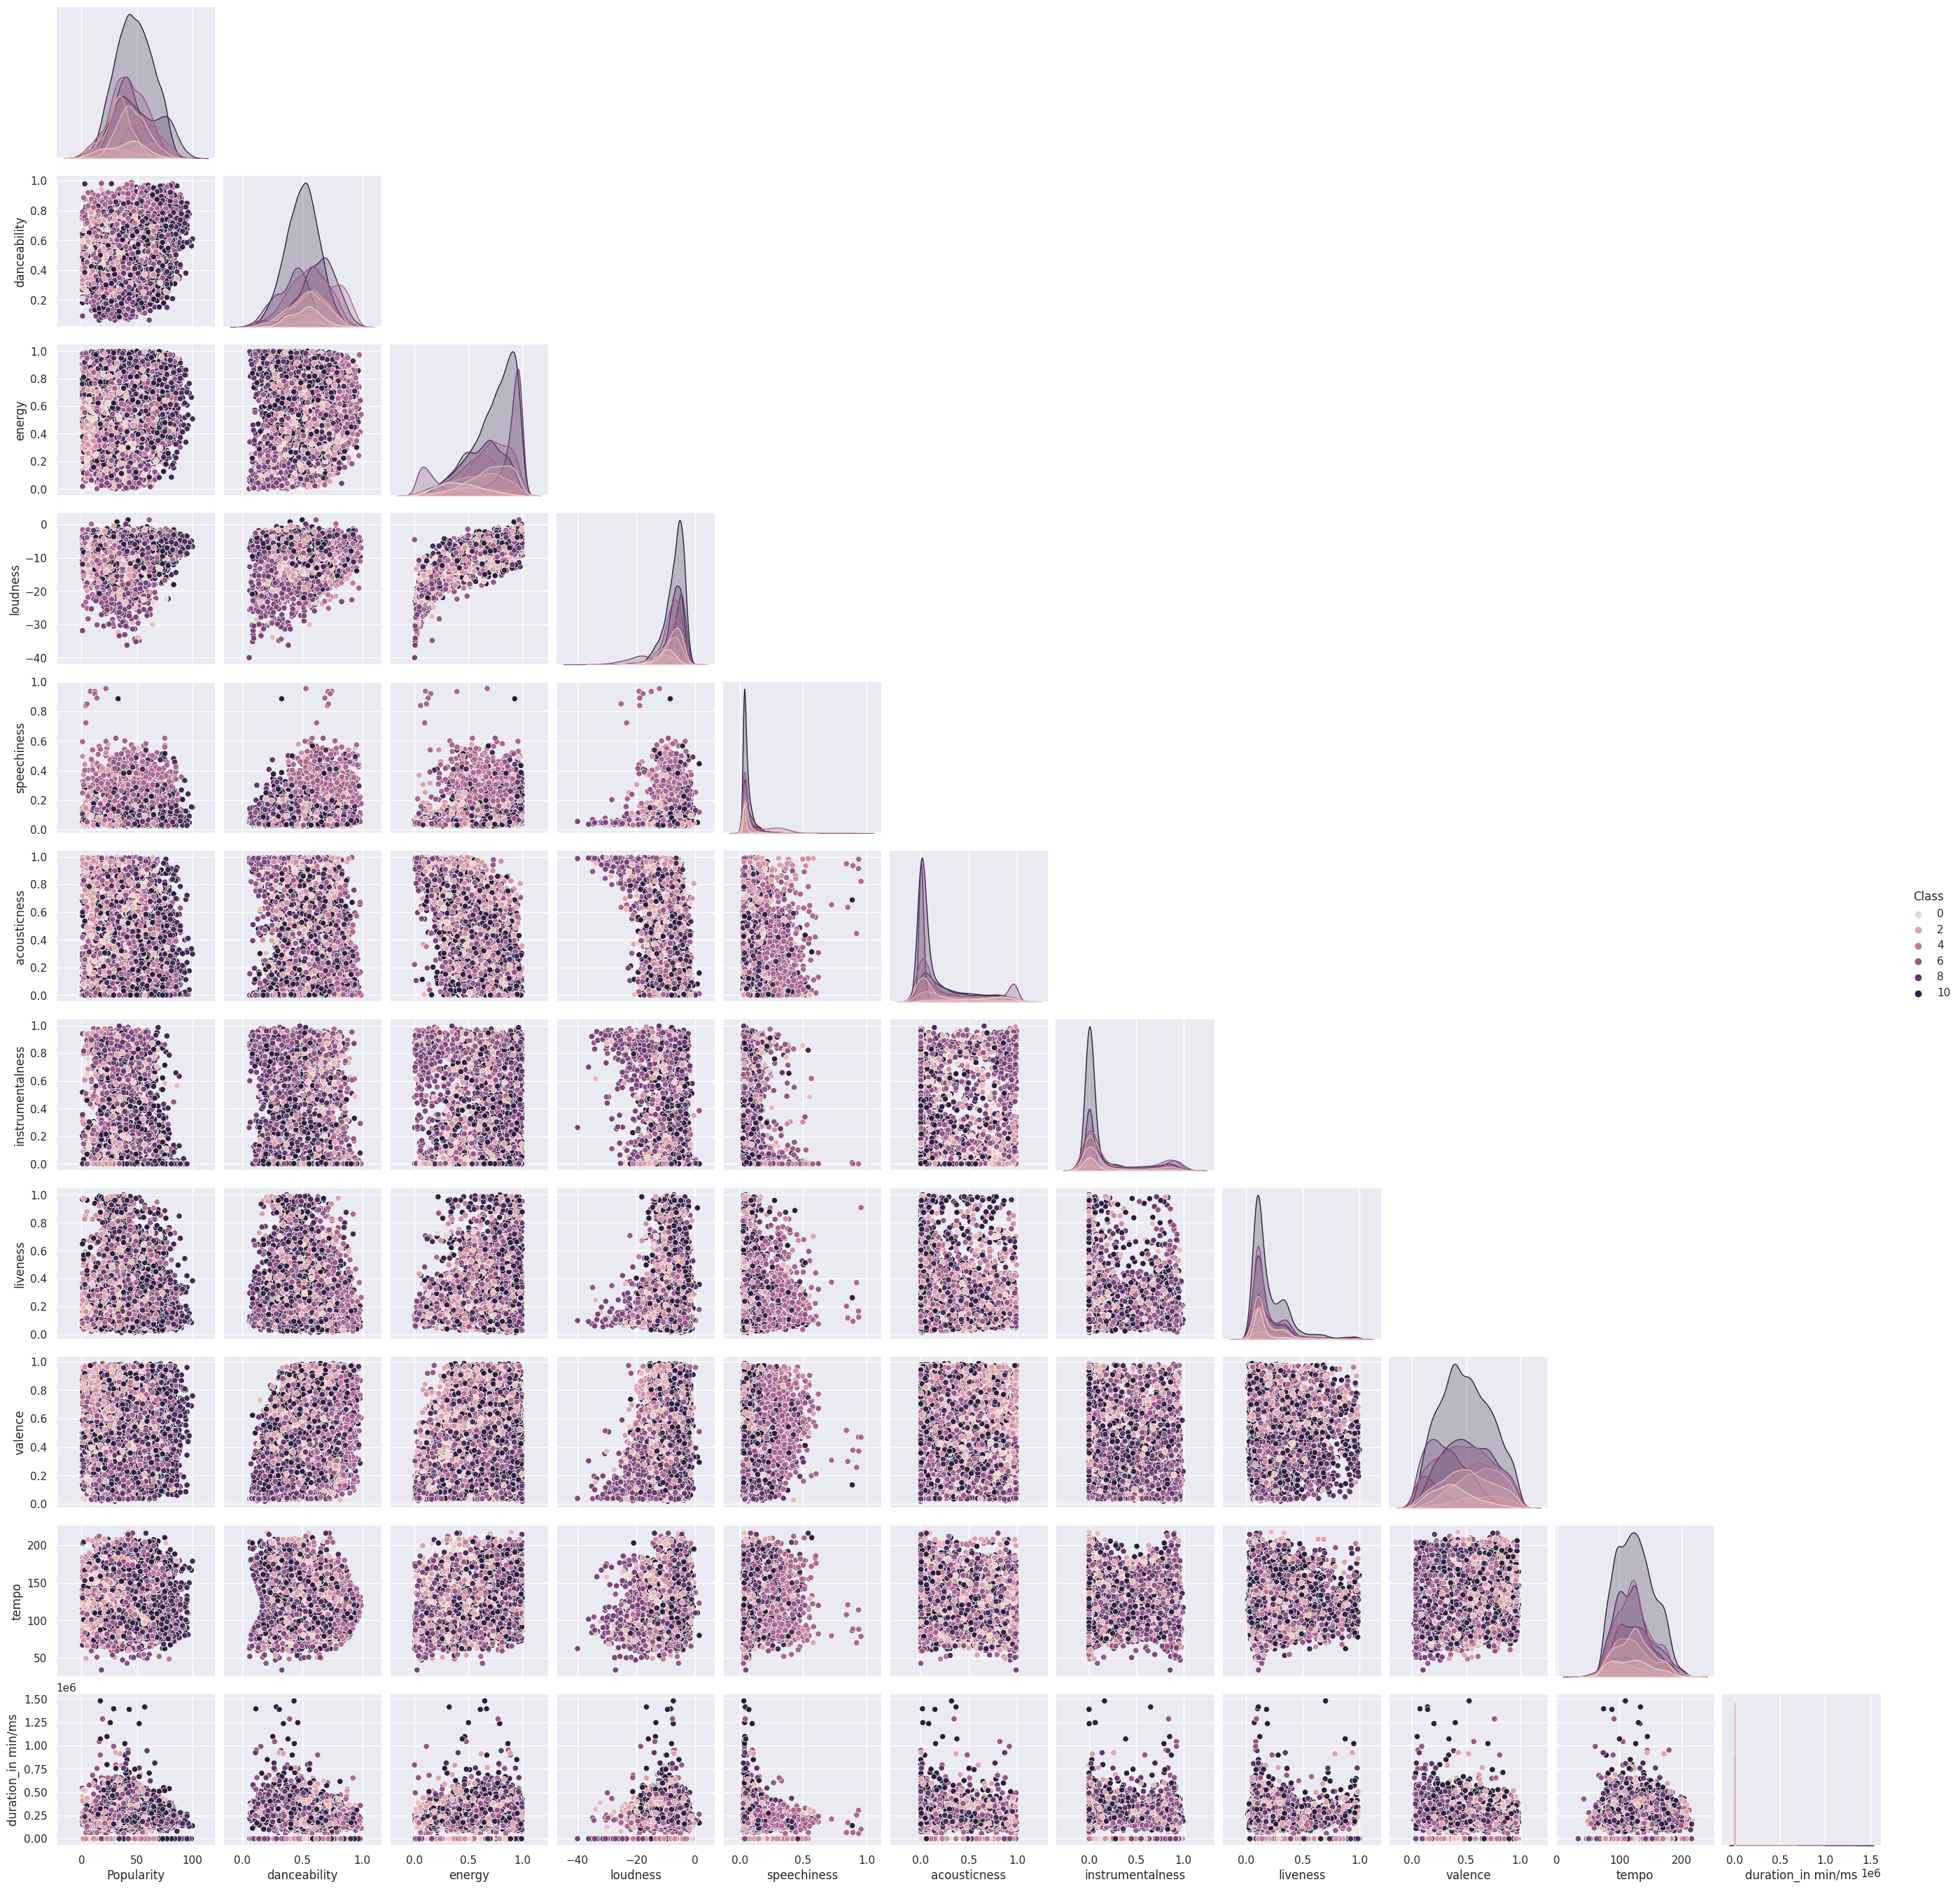

In [ ]:
sns.set(rc = {'figure.figsize':(12,10)})
sns.pairplot(num_col.drop(['key','mode','time_signature'],axis=1), corner=True, hue='Class')

energy has a strong direct corr with loudness and both of them have a strong inverse corr with acousticness.
danceability has a good relation with valence.
acousticness has an inverse relation with duration and class.
loudness has an inverse corr with instrumentalness

# 4.Preparing the Data for  modeling

## Checking Zeros:

In [ ]:
(train==0).sum()

id                       1
Artist Name              0
Track Name               0
Popularity               0
danceability             0
energy                   0
key                      0
loudness                 0
mode                  5203
speechiness              0
acousticness             2
instrumentalness         0
liveness                 0
valence                  0
tempo                    0
duration_in min/ms       0
time_signature           0
Class                  500
dtype: int64

**The zeros are considered values not missing values.**

## Checking Null

In [ ]:
train.isnull().sum()

id                       0
Artist Name              0
Track Name               0
Popularity             351
danceability             0
energy                   0
key                   1612
loudness                 0
mode                     0
speechiness              0
acousticness             0
instrumentalness      3559
liveness                 0
valence                  0
tempo                    0
duration_in min/ms       0
time_signature           0
Class                    0
dtype: int64

**instrumentalness** has 24.7% nan values approximetly a quarter of the values so we're gonna drop it. The same thing with **key** column.<br>
**Popularity** will be replaced the null with the mean value.


In [ ]:
train['key'].value_counts()

7.0     1684
2.0     1592
9.0     1578
1.0     1329
4.0     1236
11.0    1167
5.0     1125
6.0      948
8.0      899
10.0     814
3.0      412
Name: key, dtype: int64

In [ ]:
train.key.mode(), train.key.mean(), train.key.median()

(0    7.0
 Name: key, dtype: float64,
 5.957837922403003,
 6.0)

In [ ]:
#replacing nan values by the median-- medain doesn't affected by outliers.
train['Popularity']=train.Popularity.fillna(train.Popularity.median())
train['key']=train.key.fillna(train.key.median())
train.isnull().sum()

id                       0
Artist Name              0
Track Name               0
Popularity               0
danceability             0
energy                   0
key                      0
loudness                 0
mode                     0
speechiness              0
acousticness             0
instrumentalness      3559
liveness                 0
valence                  0
tempo                    0
duration_in min/ms       0
time_signature           0
Class                    0
dtype: int64

## Checking Outliers

In [5]:
import warnings
warnings.filterwarnings("ignore")

In [6]:
max_thresold = train.quantile(0.99)
max_thresold

id                     14251.05000
Popularity                84.00000
danceability               0.90700
energy                     0.98900
key                       11.00000
loudness                  -2.21460
mode                       1.00000
speechiness                0.41600
acousticness               0.98505
instrumentalness           0.94000
liveness                   0.85910
valence                    0.96300
tempo                    194.19995
duration_in min/ms    510573.70000
time_signature             5.00000
Class                     10.00000
Name: 0.99, dtype: float64

In [7]:
min_thresold = train.quantile(0.01)
min_thresold

id                    143.950000
Popularity              4.000000
danceability            0.151000
energy                  0.060790
key                     1.000000
loudness              -22.640450
mode                    0.000000
speechiness             0.025400
acousticness            0.000005
instrumentalness        0.000001
liveness                0.041095
valence                 0.039300
tempo                  71.366400
duration_in min/ms      2.451012
time_signature          3.000000
Class                   0.000000
Name: 0.01, dtype: float64

In [8]:
outliers=(train[train.columns ]< min_thresold) | (train[train.columns] > max_thresold)
outliers.sum()

Artist Name             0
Class                   0
Popularity            248
Track Name              0
acousticness          287
danceability          283
duration_in min/ms    288
energy                287
id                    288
instrumentalness      211
key                     0
liveness              288
loudness              288
mode                    0
speechiness           285
tempo                 288
time_signature         84
valence               275
dtype: int64

In [ ]:
outliers.sum().sum()

3400

In [9]:
# Removing outliers by Capping
# Note: 'time_signature' has discrete values so I can't consider that it has ooutliers, also I can't consider 'id' outliers.

for col in train.drop(['Artist Name','Track Name','id','time_signature'],axis=1).columns:
  train[col] = np.where( train[col] > max_thresold[col], max_thresold[col],
                        np.where(train[col] < min_thresold[col], min_thresold[col], train[col]) )

In [ ]:
outliers=(train[train.columns ]< min_thresold) | (train[train.columns] > max_thresold)
outliers.sum()

Artist Name             0
Class                   0
Popularity              0
Track Name              0
acousticness            0
danceability            0
duration_in min/ms      0
energy                  0
id                    288
instrumentalness        0
key                     0
liveness                0
loudness                0
mode                    0
speechiness             0
tempo                   0
time_signature         84
valence                 0
dtype: int64

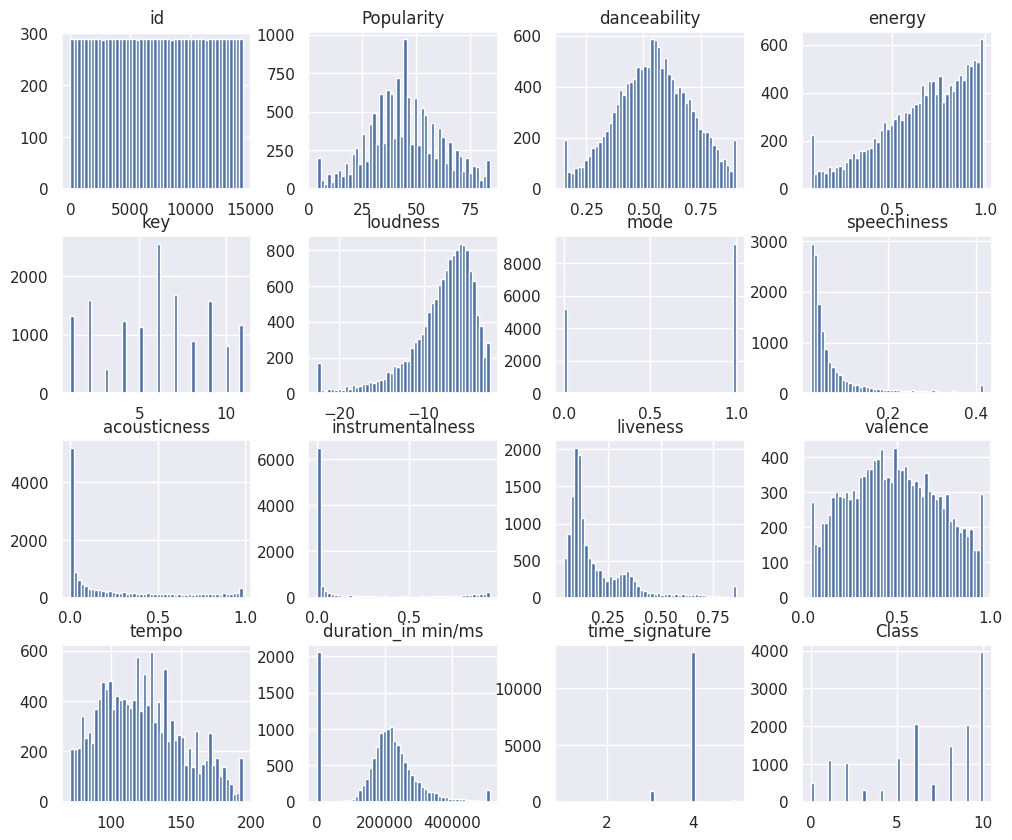

In [ ]:
train.drop(['Artist Name','Track Name'],axis=1).hist(bins=50, figsize=(12,10))
plt.show()

## Feature Selection

In [ ]:
# dropping 'Track Name', and Encoding "Artist Name"
# Droping "instrumentalness" bcus it has a lot of nan values

# 5.preprocessing data

### Pipeline the Predictors

In [10]:
from sklearn.preprocessing import OrdinalEncoder, RobustScaler, PowerTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [11]:
NumAttribs=list(train.drop(['Artist Name','Track Name','id','instrumentalness','Class'],axis=1))
CatAttribs=list(train[['Artist Name']])

num_pipeline = Pipeline(steps=[
 ('imputer', SimpleImputer(strategy="median")),
 ('scaler',RobustScaler()),
 ('transformer' ,PowerTransformer())])

Oe = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

full_pipeline = ColumnTransformer(transformers=[
("num", num_pipeline, NumAttribs), ("cat", Oe, CatAttribs) ],remainder='passthrough')

### Splitting the predictors & the Label

In [12]:
Xtrain = train.drop(['Track Name','id','instrumentalness','Class'],axis=1)
ytrain = train['Class']

In [13]:
Xtest =test.drop(['Track Name','id','instrumentalness'],axis=1)
Xtest

Artist Name  Popularity  \
0                                            Pale Waves        52.0   
1                                           Mungo Jerry        69.0   
2                            Buddy Holly & The Crickets        50.0   
3                                           Superheaven        40.0   
4                                                 HARDY        64.0   
...                                                 ...         ...   
3595                                          Wretch 32        36.0   
3596                                Lower Than Atlantis        45.0   
3597                                               Ride        50.0   
3598  Antonio Vivaldi, Andrew Watkinson, City of Lon...        23.0   
3599                                          Tal Segev        24.0   

      danceability  energy   key  loudness  mode  speechiness  acousticness  \
0            0.522  0.7260   4.0    -4.115     1       0.0383      0.348000   
1            0.754  0.4490   4.0   -14.013     1       0.0615      0.724000   
2            0.607  0.4770   9.0   -12.904     1       0.0333      0.708000   
3            0.484  0.8720   1.0    -5.586     1       0.0559      0.000384   
4            0.639  0.8430  11.0    -4.975     1       0.0362      0.052500   
...            ...     ...   ...       ...   ...          ...           ...   
3595         0.476  0.7470   2.0    -5.768     1       0.2500      0.007530   
3596         0.561  0.8230   2.0    -4.851     1       0.0970      0.002900   
3597         0.200  0.2930  10.0   -18.822     1       0.0364      0.013300   
3598         0.221  0.0773  10.0   -24.881     1       0.0408      0.925000   
3599         0.630  0.8130   7.0    -6.284     1       0.0412      0.085600   

      liveness  valence    tempo  duration_in min/ms  time_signature  
0       0.1480   0.3310  161.867       189587.000000               4  
1       0.1620   0.9730   82.751       211880.000000               4  
2       0.2530   0.8870  136.614       122600.000000               4  
3       0.1480   0.3470  150.027       222208.000000               4  
4       0.0854   0.5280  126.047       217802.000000               4  
...        ...      ...      ...                 ...             ...  
3595    0.1730   0.1220  140.268       234806.000000               4  
3596    0.4920   0.5250   93.504       200760.000000               4  
3597    0.2540   0.0417  149.445       183187.000000               4  
3598    0.1270   0.0944   84.594            2.728883               4  
3599    0.3760   0.3750  121.962       198211.000000               4  

[3600 rows x 14 columns]

In [14]:
Xtrain_prep= full_pipeline.fit_transform(Xtrain)
Xtrain_prep

array([[-1.27373538e+00, -1.04575830e+00, -1.58614222e-01, ...,
        -1.80986281e+00, -2.45630630e+00,  3.82700000e+03],
       [ 4.22015941e-02,  6.95675605e-01, -2.91830136e-01, ...,
         2.31328167e-02,  1.30933557e-01,  3.51000000e+03],
       [ 3.90935516e-01, -5.25353559e-01,  1.27967651e-01, ...,
         1.43586337e-01,  1.30933557e-01,  6.59500000e+03],
       ...,
       [-1.92964047e-01,  9.25402296e-01, -6.91799598e-01, ...,
        -7.77431760e-02,  1.30933557e-01,  7.53000000e+03],
       [ 2.17124729e-01, -7.98236963e-01, -5.60535232e-01, ...,
         3.34558619e-01,  1.30933557e-01,  5.35700000e+03],
       [ 1.07711015e+00, -8.21874332e-01,  1.45722422e+00, ...,
         6.86893127e-01,  1.30933557e-01,  4.16600000e+03]])

# 6.Training Models

In [15]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import f1_score

In [16]:
scores = pd.DataFrame( columns = ['Model', 'F1-Score'])

In [17]:
def score(i,model,preds): 
  scores.loc[i] =[ model, f1_score(ytrain, preds, average="micro") ]
  return scores.loc[[i]]

## Logistic Regression

In [18]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lr_clf = LogisticRegression()
lr_clf.fit(Xtrain_prep, ytrain)

LogisticRegression()

In [ ]:
ytrain_lr_pred = cross_val_predict(lr_clf, Xtrain_prep, ytrain, cv=3)
score(0 ,'Logistic Regression', ytrain_lr_pred)

Model  F1-Score
0  Logistic Regression  0.411642

## Decision Tree

In [19]:
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier()
dt_clf.fit(Xtrain_prep, ytrain)

DecisionTreeClassifier()

In [20]:
ytrain_dt_pred = cross_val_predict(dt_clf, Xtrain_prep, ytrain, cv=3)
score(1 ,'Decision Tree', ytrain_dt_pred)

Model  F1-Score
1  Decision Tree  0.358711

## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier()
rf_clf.fit(Xtrain_prep, ytrain)

RandomForestClassifier()

In [ ]:
ytrain_rf_pred = cross_val_predict(rf_clf, Xtrain_prep, ytrain, cv=3)
score(2 ,'Random Forest', ytrain_rf_pred)


Model  F1-Score
2  Random Forest  0.499653

## SVM

In [ ]:
from sklearn.svm import SVC

svm_clf = SVC(gamma="auto", random_state=42)
svm_clf.fit(Xtrain_prep, ytrain)

SVC(gamma='auto', random_state=42)

In [ ]:
ytrain_svm_pred = cross_val_predict(svm_clf, Xtrain_prep, ytrain, cv=3)
score(3 ,'SVM', ytrain_svm_pred)

Model  F1-Score
3   SVM  0.275007

## K-Nearest Neighbours

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier(weights='distance', n_neighbors=4)
knn_clf.fit(Xtrain_prep, ytrain)

KNeighborsClassifier(n_neighbors=4, weights='distance')

In [ ]:
ytrain_knn_pred = cross_val_predict(knn_clf, Xtrain_prep, ytrain, cv=3)
score(4 ,'K-Nearest Neighbours', ytrain_knn_pred)

Model  F1-Score
4  K-Nearest Neighbours  0.403306

## Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

NB_clf = GaussianNB() 
NB_clf.fit(Xtrain_prep, ytrain)

GaussianNB()

In [ ]:
ytrain_NB_pred = cross_val_predict(NB_clf, Xtrain_prep, ytrain, cv=3)
score(5 , 'Naive Bayes', ytrain_NB_pred)


Model  F1-Score
5  Naive Bayes  0.432203

# 7.Training Ensamble Methods

## Voting Classifiers

### Hard Voting

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

log_clf = LogisticRegression(solver="lbfgs", random_state=42)
rnd_clf = RandomForestClassifier(n_estimators=100, random_state=42)
svm_clf = SVC(gamma="scale", random_state=42)
NB_clf = GaussianNB() 

Hvoting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf),('NB',NB_clf)],
    voting='hard')

Hvoting_clf.fit(Xtrain_prep, ytrain)

VotingClassifier(estimators=[('lr', LogisticRegression(random_state=42)),
                             ('rf', RandomForestClassifier(random_state=42)),
                             ('svc', SVC(random_state=42)),
                             ('NB', GaussianNB())])

In [ ]:
ytrain_Hvoting_pred = cross_val_predict(Hvoting_clf, Xtrain_prep, ytrain, cv=3)
score(6 ,'Hard Voting', ytrain_Hvoting_pred)


Model  F1-Score
6  Hard Voting  0.478119

### Soft Voting

In [ ]:
log_clf = LogisticRegression(solver="lbfgs", random_state=42)
rnd_clf = RandomForestClassifier(n_estimators=100, random_state=42)
svm_clf = SVC(gamma="scale", probability=True, random_state=42)
NB_clf = GaussianNB() 
Svoting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf),('NB',NB_clf)],
    voting='soft')
Svoting_clf.fit(Xtrain_prep, ytrain)

VotingClassifier(estimators=[('lr', LogisticRegression(random_state=42)),
                             ('rf', RandomForestClassifier(random_state=42)),
                             ('svc', SVC(probability=True, random_state=42)),
                             ('NB', GaussianNB())],
                 voting='soft')

In [ ]:
ytrain_Svoting_pred = cross_val_predict(Svoting_clf, Xtrain_prep, ytrain, cv=3)
score(7 ,'Soft Voting', ytrain_Svoting_pred)


Model  F1-Score
7  Soft Voting  0.473187

## Bagging and Pasting

### Bagging

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_clf = BaggingClassifier(
    DecisionTreeClassifier(), n_estimators=500,
    max_samples=100, bootstrap=True, random_state=42)
bag_clf.fit(Xtrain_prep, ytrain)

BaggingClassifier(estimator=DecisionTreeClassifier(), max_samples=100,
                  n_estimators=500, random_state=42)

In [ ]:
ytrain_Bagging_pred = cross_val_predict(bag_clf, Xtrain_prep, ytrain, cv=3)
score(8 ,'Bagging', ytrain_Bagging_pred)


Model  F1-Score
8  Bagging  0.482009

### Pasting

In [ ]:
past_clf = BaggingClassifier(
    DecisionTreeClassifier(), n_estimators=500,
    max_samples=100, bootstrap=False, random_state=42)
past_clf.fit(Xtrain_prep, ytrain)

BaggingClassifier(bootstrap=False, estimator=DecisionTreeClassifier(),
                  max_samples=100, n_estimators=500, random_state=42)

In [ ]:
ytrain_past_pred = cross_val_predict(past_clf, Xtrain_prep, ytrain, cv=3)
score(9 ,'Pasting', ytrain_past_pred)


Model  F1-Score
9  Pasting  0.482565

## Boosting

### AdaBoost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1), n_estimators=200,
    algorithm="SAMME.R", learning_rate=0.5, random_state=42)
ada_clf.fit(Xtrain_prep, ytrain)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=0.5, n_estimators=200, random_state=42)

In [ ]:
ytrain_ada_pred = cross_val_predict(ada_clf, Xtrain_prep, ytrain, cv=3)
score(10 ,'AdaBoost', ytrain_ada_pred)


Model  F1-Score
10  AdaBoost  0.278133

### Extreme Gradient Boost (XGBoosting)

In [ ]:
import xgboost as xgb

In [ ]:
xgb_clf = xgb.XGBClassifier( random_state=42)
xgb_clf.fit(Xtrain_prep, ytrain)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [ ]:
ytrain_xgb_pred = cross_val_predict(xgb_clf, Xtrain_prep, ytrain, cv=3)
score(11 ,'XGBoost', ytrain_xgb_pred)


Model  F1-Score
11  XGBoost  0.506807

## Stacking

In [ ]:
from sklearn.ensemble import StackingClassifier

In [ ]:
log_clf = LogisticRegression()
rnd_clf = RandomForestClassifier(n_estimators=100, random_state=42)
svm_clf = SVC(gamma="scale", random_state=42)
knn_clf = KNeighborsClassifier(weights='distance', n_neighbors=4)
NB_clf = GaussianNB() 

estimators = [
    ('rnd_clf' , RandomForestClassifier(n_estimators=10, random_state=42)),
    ('svm_clf' , SVC( random_state=42)),
    ('knn_clf' , KNeighborsClassifier( n_neighbors=4)),
    ('NB_clf' , GaussianNB()) ]

stack_clf = StackingClassifier( estimators=estimators, final_estimator=log_clf )

In [ ]:
stack_clf.fit(Xtrain_prep, ytrain)

StackingClassifier(estimators=[('rnd_clf',
                                RandomForestClassifier(n_estimators=10,
                                                       random_state=42)),
                               ('svm_clf', SVC(random_state=42)),
                               ('knn_clf', KNeighborsClassifier(n_neighbors=4)),
                               ('NB_clf', GaussianNB())],
                   final_estimator=LogisticRegression())

In [ ]:
ytrain_stack_pred = cross_val_predict(stack_clf, Xtrain_prep, ytrain, cv=3)
score(12 ,'Stacking', ytrain_stack_pred)

Model  F1-Score
12  Stacking  0.531189

# 8.Fine-Tuning models

## **Optuna**
It uses Bayesian optimization to find the best hyperparameters.

In [ ]:
!pip install optuna

### Optimizing Random Forest & SVC hyperparameters

In [ ]:
import sklearn
import optuna

import sklearn.ensemble
import sklearn.model_selection
import sklearn.svm

# 1. Define an objective function to be maximized.
def objective(trial):

    x, y = Xtrain_prep, ytrain

    # 2. Suggest values for the hyperparameters using a trial object.
    classifier_name = trial.suggest_categorical("classifier", ["SVC", "RandomForest"])
    if classifier_name == "SVC":
        svc_c = trial.suggest_float("svc_c", 1e-10, 1e10, log=True)
        classifier_obj = sklearn.svm.SVC(C=svc_c, gamma="auto")
    else:
        rf_max_depth = trial.suggest_int("rf_max_depth", 2, 32, log=True)
        
        classifier_obj = sklearn.ensemble.RandomForestClassifier(
            max_depth=rf_max_depth, n_estimators=10
        )
        
    score = sklearn.model_selection.cross_val_score(classifier_obj, x, y, n_jobs=-1, cv=3)
    accuracy = score.mean()
    return accuracy


# 3. Create a study object and optimize the objective function.
if __name__ == "__main__":
    study = optuna.create_study(direction="maximize")
    study.optimize(objective, n_trials=100)
    print(study.best_trial)

In [ ]:
print("Best score= ",study.best_trial.value,"\nThe parameters: ",study.best_trial.params)

Best score=  0.4956233355664997 
The parameters:  {'classifier': 'RandomForest', 'rf_max_depth': 10}


In [ ]:
params = study.best_trial.params

rf_opt = RandomForestClassifier(max_depth= 10)
rf_opt.fit(Xtrain_prep, ytrain)

RandomForestClassifier(max_depth=10)

In [ ]:
ytrain_rfopt_pred = cross_val_predict(rf_opt, Xtrain_prep, ytrain, cv=3)
score(13 ,'Random Forest Optimized', ytrain_rfopt_pred)

Model  F1-Score
13  Random Forest Optimized  0.510697

### Optimizing XGBoosting

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.datasets import load_wine
import optuna

X_train, X_valid, y_train, y_valid = train_test_split(Xtrain_prep, ytrain, test_size=0.25, random_state=42)


In [ ]:
def objective(trial):
    """Define the objective function"""

    params = {
        'max_depth': trial.suggest_int('max_depth', 1, 9),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 1.0),
        'n_estimators': trial.suggest_int('n_estimators', 50, 500),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'gamma': trial.suggest_loguniform('gamma', 1e-8, 1.0),
        'subsample': trial.suggest_loguniform('subsample', 0.01, 1.0),
        'colsample_bytree': trial.suggest_loguniform('colsample_bytree', 0.01, 1.0),
        'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-8, 1.0),
        'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-8, 1.0),
        'eval_metric': 'mlogloss',
        'use_label_encoder': False
    }

    # Fit the model
    optuna_model = XGBClassifier(**params)
    optuna_model.fit(X_train, y_train)

    # Make predictions
    y_pred = optuna_model.predict(X_valid)

    # Evaluate predictions
    accuracy = accuracy_score(y_valid, y_pred)
    return accuracy

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

In [ ]:
print("Best score= ",study.best_trial.value,"\nThe parameters: ",study.best_trial.params)

Best score=  0.5445957210336204 
The parameters:  {'max_depth': 3, 'learning_rate': 0.0647664536699521, 'n_estimators': 453, 'min_child_weight': 1, 'gamma': 0.0001125927996912571, 'subsample': 0.5506043964074268, 'colsample_bytree': 0.7014658422213744, 'reg_alpha': 9.310943441938085e-06, 'reg_lambda': 0.0006316745759593003}


In [ ]:
params = study.best_trial.params
xgb_opt = XGBClassifier(**params)
xgb_opt.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7014658422213744, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.0001125927996912571, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.0647664536699521, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=453, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [ ]:
ytrain_xgbopt_pred = cross_val_predict(xgb_opt, Xtrain_prep, ytrain, cv=3)
score(14 ,'XGBoost Optimized', ytrain_xgbopt_pred)

Model  F1-Score
14  XGBoost Optimized  0.538205

# Evaluation
using F1 score <br>
F1 = 2 * (precision * recall) / (precision + recall)

In [ ]:
scores

Model  F1-Score
0       Logistic Regression  0.411642
1             Decision Tree  0.353848
2             Random Forest  0.499653
3                       SVM  0.275007
4      K-Nearest Neighbours  0.403306
5               Naive Bayes  0.432203
6               Hard Voting  0.478119
7               Soft Voting  0.473187
8                   Bagging  0.482009
9                   Pasting  0.482565
10                 AdaBoost  0.278133
11                  XGBoost  0.506807
12                 Stacking  0.531189
13  Random Forest Optimized  0.510697
14        XGBoost Optimized  0.538205

# 9.Presenting the Solution

In [ ]:
final_model= xgb_opt

In [ ]:
Xtest_prepared = full_pipeline.transform(Xtest)
Xtest_prepared 

array([[ 4.48646296e-01, -1.42029574e-01,  1.03153326e-01, ...,
        -1.39543895e-01,  1.30933557e-01,  5.03500000e+03],
       [ 1.41575862e+00,  1.28790507e+00, -9.80590576e-01, ...,
         7.43308201e-02,  1.30933557e-01, -1.00000000e+00],
       [ 3.33114396e-01,  3.75099768e-01, -8.90032924e-01, ...,
        -7.53643693e-01,  1.30933557e-01, -1.00000000e+00],
       ...,
       [ 3.33114396e-01, -2.03481278e+00, -1.43610766e+00, ...,
        -1.99892556e-01,  1.30933557e-01,  5.49500000e+03],
       [-1.27373538e+00, -1.91359790e+00, -1.96547555e+00, ...,
        -1.80988339e+00,  1.30933557e-01, -1.00000000e+00],
       [-1.21290311e+00,  5.16542803e-01,  5.68055339e-01, ...,
        -5.75205726e-02,  1.30933557e-01, -1.00000000e+00]])

In [ ]:
predictions = final_model.predict(Xtest_prepared)

In [ ]:
submission=test[['id']]

submission['Class']= predictions
submission


id  Class
0        0     10
1        1     10
2        2      6
3        3     10
4        4     10
...    ...    ...
3595  3595      6
3596  3596     10
3597  3597     10
3598  3598      7
3599  3599      6

[3600 rows x 2 columns]

In [24]:
submission.to_csv('submission.csv',index=None)